In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder


In [15]:
beoseot = pd.read_csv('mushrooms.csv')
beoseot

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [16]:
beoseot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

class : 버섯의 독성 여부
- 'p' : 독
- 'e' : 식용

cap-shape : 버섯 갓의 형태
- 'b' : 벨
- 'c' : 원추
- 'x' : 평평
- 'f' : 울퉁불퉁
- 'k' : 볼록
- 's' : 오목

cap-surface : 버섯 갓의 표면 상태
- 'f' : 섬유질
- 'g' : 고르지 않은
- 'y' : 비늘 같은
- 's' : 매끈한

cap-color : 버섯 갓의 색상
- 'n' : 갈색
- 'b' : 버프색
- 'c' : 계피색
- 'g' : 회색
- 'r' : 녹색
- 'p' : 분홍색
- 'u' : 자색
- 'e' : 빨간색
- 'w' : 하얀색
- 'y' : 노란색

bruises : 버섯이 상처에 의해 멍이 드는지 여부
- 't' : 멍이 듦
- 'f' : 멍이 들지 않음

odor : 버섯의 냄새
- 'a' : 아몬드 향
- 'l' : 아니스 향
- 'c' : 크레오솟 향
- 'y' : 생선 향
- 'f' : 불쾌한 향
- 'm' : 머스크 향
- 'n' : 무향
- 'p' : 매운 향
- 's' : 흙냄새

In [17]:
for i in beoseot.columns:
    print(f"{i}의 종류\n{beoseot[i].unique()}\n")

class의 종류
['p' 'e']

cap-shape의 종류
['x' 'b' 's' 'f' 'k' 'c']

cap-surface의 종류
['s' 'y' 'f' 'g']

cap-color의 종류
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

bruises의 종류
['t' 'f']

odor의 종류
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

gill-attachment의 종류
['f' 'a']

gill-spacing의 종류
['c' 'w']

gill-size의 종류
['n' 'b']

gill-color의 종류
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

stalk-shape의 종류
['e' 't']

stalk-root의 종류
['e' 'c' 'b' 'r' '?']

stalk-surface-above-ring의 종류
['s' 'f' 'k' 'y']

stalk-surface-below-ring의 종류
['s' 'f' 'y' 'k']

stalk-color-above-ring의 종류
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']

stalk-color-below-ring의 종류
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']

veil-type의 종류
['p']

veil-color의 종류
['w' 'n' 'o' 'y']

ring-number의 종류
['o' 't' 'n']

ring-type의 종류
['p' 'e' 'l' 'f' 'n']

spore-print-color의 종류
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']

population의 종류
['s' 'n' 'a' 'v' 'y' 'c']

habitat의 종류
['u' 'g' 'm' 'd' 'p' 'w' 'l']



> stalk-root 변수에 '?'값 존재 (아마 구조를 정확히 파악 불가 라고 보는게 맞을 듯)

In [18]:
featureDF = beoseot.drop('class', axis = 1)
targetSR = beoseot['class']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR,
                                                    stratify = targetSR,
                                                    train_size = 0.8)

In [20]:
X_train_dum = pd.get_dummies(X_train)
X_test_dum = pd.get_dummies(X_test)

[1] 결정트리

In [21]:
dt_params = {'max_depth' : [2, 4, 6],
             'min_samples_split': [100, 200, 300],
             'min_samples_leaf': [2, 4, 6]}

In [22]:
dt = DecisionTreeClassifier()

# GridSearchCV 객체 생성
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_params,
                              cv=5, scoring='accuracy')

# 그리드 탐색 수행
dt_grid_search.fit(X_train_dum, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6], 'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [100, 200, 300]},
             scoring='accuracy')

In [23]:
dt_best = dt_grid_search.best_estimator_

print(f"최적의 하이퍼 파라미터 : {dt_grid_search.best_params_}")
print(f"훈련 세트 점수 : {dt_best.score(X_train_dum, y_train):.4f}")
print(f"테스트 세트 점수 : {dt_best.score(X_test_dum, y_test):.4f}")

최적의 하이퍼 파라미터 : {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 100}
훈련 세트 점수 : 0.9972


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- cap-shape_c
- cap-surface_g


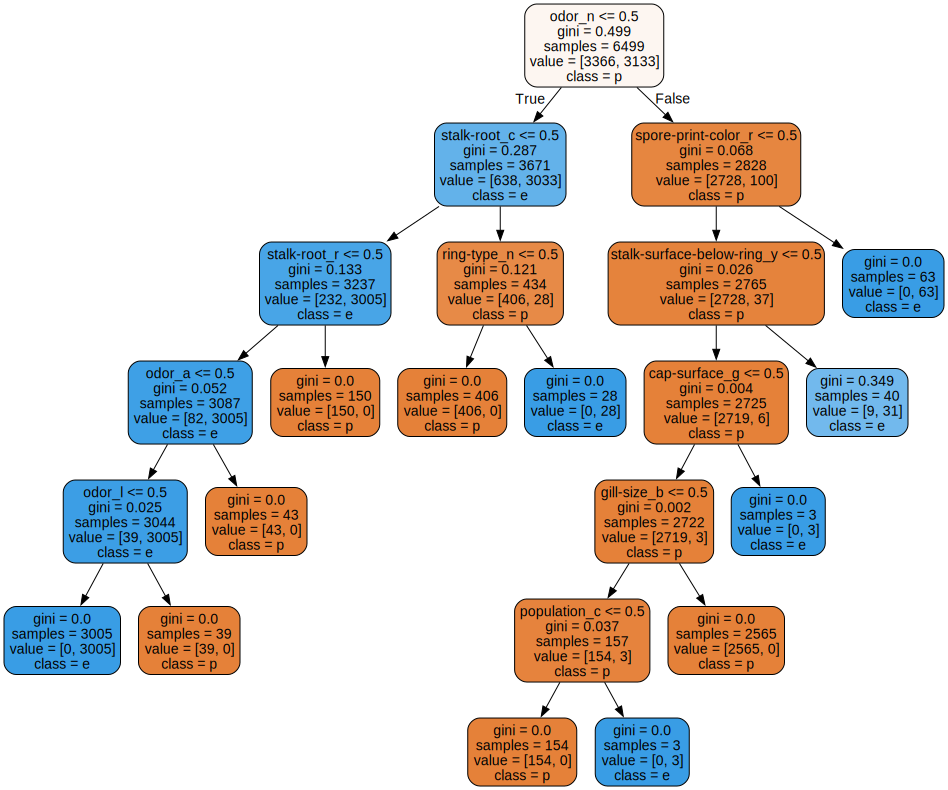

In [ ]:
# (1) DT모델을 dot포맷의 파일로 저장 ==> export_graphviz()
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_best, out_file='tree.dot',
                class_names=beoseot['class'].unique(),
                feature_names=dt_best.feature_names_in_,
                impurity=True, filled=True, rounded=True)

# (2) dot파일 출력
# 파일에서 데이터 읽어오기
with open('tree.dot') as f:
    dot_data = f.read()

# 화면에 출력하기
graphviz.Source(dot_data)

[2] 로지스틱 회귀

In [ ]:
lr_params = {'solver' : ['liblinear', 'lbfgs'],
             'max_iter': [100, 200, 300],
             'C': [1, 0.1, 0.01]}

In [ ]:
lr = LogisticRegression()

# GridSearchCV 객체 생성
lr_grid_search = GridSearchCV(estimator=lr, param_grid=lr_params,
                              cv=5, scoring='accuracy')

# 그리드 탐색 수행
lr_grid_search.fit(X_train_dum, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 0.1, 0.01], 'max_iter': [100, 200, 300],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [ ]:
lr_best = lr_grid_search.best_estimator_

print(f"최적의 하이퍼 파라미터 : {lr_grid_search.best_params_}")
print(f"훈련 세트 점수 : {lr_best.score(X_train_dum, y_train):.4f}")
print(f"테스트 세트 점수 : {lr_best.score(X_test_dum, y_test):.4f}")

최적의 하이퍼 파라미터 : {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
훈련 세트 점수 : 1.0000
테스트 세트 점수 : 1.0000
